In [1]:
!pip install idx2numpy

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#@title Importing Libraries
import idx2numpy, math
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier

In [4]:
def getClassWise(yTrue, yPredict):
  mat = confusion_matrix(yTrue, yPredict)
  accuracy  = mat.diagonal()/mat.sum(axis=1)
  for i in range(len(accuracy)):
    print(f"Accuracy for class-{i}:", accuracy[i]*100)

  print("\nOverall Accuracy:", accuracy_score(yTrue, yPredict)*100)

In [5]:
def centralize(data):
  shape = data.shape
  mu = data.mean(axis = 0)
  data = data/255 - 0.5
  return data.reshape((-1, shape[1] * shape[2]))

In [6]:
def loadMnist():
  file = '/content/drive/MyDrive/Colab Notebooks/SML-A3/mnist/'
  mtrain_images = idx2numpy.convert_from_file(file + 'train-images-idx3-ubyte')
  mtrain_labels = idx2numpy.convert_from_file(file + 'train-labels-idx1-ubyte')
  mtest_images = idx2numpy.convert_from_file(file + 't10k-images-idx3-ubyte')
  mtest_labels = idx2numpy.convert_from_file(file + 't10k-labels-idx1-ubyte')
  return centralize(mtrain_images), mtrain_labels, centralize(mtest_images), mtest_labels

##Q2-FMNIST(FFNN)

In [20]:
#@title Importing Libraries

import idx2numpy, math
import numpy as np
from matplotlib import pyplot as plt
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.layers import BatchNormalization
from keras import initializers
from tensorflow.keras import optimizers
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from keras.losses import SparseCategoricalCrossentropy, MeanSquaredError
from keras.utils.np_utils import to_categorical   
from keras.callbacks import EarlyStopping
from keras.preprocessing.image import ImageDataGenerator



In [8]:
def loadFMnist():
  file = '/content/drive/MyDrive/Colab Notebooks/SML-A3/fmnist/'
  fmtrain_images = idx2numpy.convert_from_file(file + 'train-images-idx3-ubyte')
  fmtrain_labels = idx2numpy.convert_from_file(file + 'train-labels-idx1-ubyte')
  fmtest_images = idx2numpy.convert_from_file(file + 't10k-images-idx3-ubyte')
  fmtest_labels = idx2numpy.convert_from_file(file + 't10k-labels-idx1-ubyte')
  return fmtrain_images, fmtrain_labels, fmtest_images, fmtest_labels

In [9]:
def centralize(data):
  shape = data.shape
  data = data/255 - 0.5
  return data.reshape((-1, shape[1] * shape[2]))

Shape of images is.. (60000, 28, 28)
Shape of labels is.. (60000,)
Showing orig image


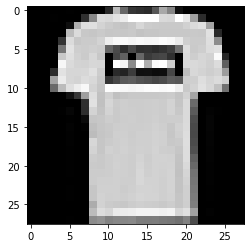

In [10]:
fmtrainImages, fmtrainLabels, fmtestImages, fmtestLabels = loadFMnist()

#print shape and image sample
print('Shape of images is..',fmtrainImages.shape)
print('Shape of labels is..',fmtrainLabels.shape)
print('Showing orig image')
pixels = fmtrainImages[1,:,:]
plt.imshow(pixels, cmap='gray')
plt.show()

fmtrainImages = centralize(fmtrainImages)
fmtestImages = centralize(fmtestImages)

fvalImages = fmtestImages[0:500]
fvalLabels = fmtestLabels[0:500]

fmtestImages = fmtestImages[500:]
fmtestLabels = fmtestLabels[500:]


input_dim = fmtrainImages.shape[1]
hidden_dim1 = 512
hidden_dim2 = 128
hidden_dim3 = 64
output_dim = len(set(fmtestLabels))

In [11]:
model = Sequential()
model.add(Dense(units=input_dim, input_dim=input_dim, 
                trainable=True, 
                activation='relu', 
                kernel_initializer=initializers.RandomNormal(mean=0., stddev=1.)
                ))

model.add(Dense(units=hidden_dim1,
                activation='relu',
                ))

model.add(Dense(units=hidden_dim1,
                activation='relu',
                ))

model.add(Dense(units=hidden_dim2,
                activation='relu',
                ))

model.add(Dense(units=hidden_dim3,
                activation='relu',
                ))

model.add(Dense(units=output_dim, trainable=True, activation='softmax'))

# obtain the summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 784)               615440    
                                                                 
 dense_1 (Dense)             (None, 512)               401920    
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dense_3 (Dense)             (None, 128)               65664     
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 1,354,586
Trainable params: 1,354,586
Non-

In [12]:
# Compile the model.
model.compile(
  optimizer=optimizers.SGD(learning_rate=0.001),
  loss=SparseCategoricalCrossentropy(),
  metrics=['accuracy'],
)

In [13]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience = 5)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', 
                     verbose=1, save_best_only=True)

# Train the model.
history=model.fit(
  fmtrainImages,
  fmtrainLabels,
  validation_data=(fvalImages, fvalLabels),
  epochs=40,
  batch_size=32,
  shuffle = True,
  callbacks=[es,mc],
)

Epoch 1/40
1874/1875 [============================>.] - ETA: 0s - loss: 0.6077 - accuracy: 0.7874
Epoch 1: val_accuracy improved from -inf to 0.83600, saving model to best_model.h5
1875/1875 [==============================] - 50s 26ms/step - loss: 0.6076 - accuracy: 0.7873 - val_loss: 0.4476 - val_accuracy: 0.8360
Epoch 2/40
1872/1875 [============================>.] - ETA: 0s - loss: 0.4364 - accuracy: 0.8450
Epoch 2: val_accuracy improved from 0.83600 to 0.84200, saving model to best_model.h5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.4364 - accuracy: 0.8450 - val_loss: 0.4303 - val_accuracy: 0.8420
Epoch 3/40
1874/1875 [============================>.] - ETA: 0s - loss: 0.3931 - accuracy: 0.8574
Epoch 3: val_accuracy improved from 0.84200 to 0.84400, saving model to best_model.h5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.3933 - accuracy: 0.8573 - val_loss: 0.4141 - val_accuracy: 0.8440
Epoch 4/40
1872/1875 [========================

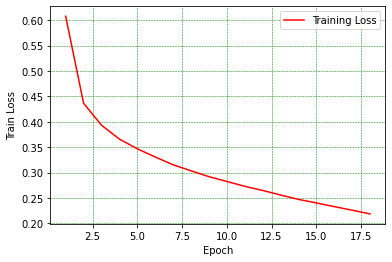

In [14]:
loss = history.history['loss']
epoch = np.arange(1, len(loss) + 1)

plt.plot(epoch, loss, label="Training Loss", color  = "red")

plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.legend()
plt.xlabel('Epoch')
plt.ylabel("Train Loss")
plt.show()

In [15]:
pred = model.predict(fmtestImages)
prediction = np.argmax(pred, axis = 1)
getClassWise(fmtestLabels, prediction)

Accuracy for class-0: 75.97883597883597
Accuracy for class-1: 96.62447257383965
Accuracy for class-2: 74.33155080213903
Accuracy for class-3: 87.31656184486373
Accuracy for class-4: 85.79003181336161
Accuracy for class-5: 94.58896982310094
Accuracy for class-6: 68.73032528856243
Accuracy for class-7: 94.85834207764952
Accuracy for class-8: 95.81589958158996
Accuracy for class-9: 95.58823529411765

Overall Accuracy: 87.0


Weights (12,)
Weights (784, 784)
min of weights: -3.3681083
max of weights: 2.994393
shape of weights: (784,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  


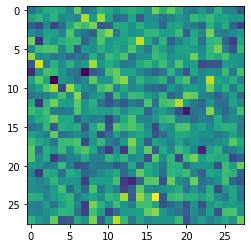

In [16]:
# obtain weights and display
weights = np.array(model.get_weights()) 
print('Weights', weights.shape)
weightsnode = weights[0]
print('Weights', weightsnode.shape)
weightsnode = weightsnode[:,1]

print("min of weights:",np.amin(weightsnode))
print("max of weights:",np.amax(weightsnode))
print("shape of weights:",weightsnode.shape)
data = ((weightsnode-np.amin(weightsnode))/(np.amax(weightsnode)-np.amin(weightsnode)))*255
data = np.reshape(data, (-1, 28))
plt.imshow(data)
plt.show()

In [23]:
# Evaluate the model.
saved_model = load_model('best_model.h5')
scores = saved_model.evaluate(
  fmtestImages,
  fmtestLabels
)

print('Test accuracy:', scores[1])

297/297 [==============================] - 2s 5ms/step - loss: 0.3692 - accuracy: 0.8662
Test accuracy: 0.8662105202674866


predictions of model: [2.7096476e-02 6.2418100e-04 7.3127252e-01 2.8930372e-03 6.3371575e-03
 1.0693846e-04 2.3072720e-01 1.6653266e-04 6.9328089e-04 8.2630126e-05]
predicted classes: [2 0 5 7 1]
test labels: [2 0 5 7 1]


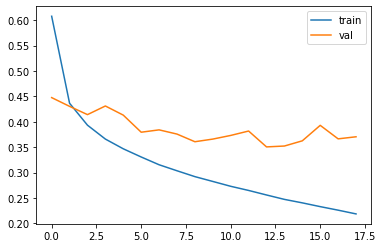

In [18]:
# Save the model to disk.
model.save_weights('model.h5')
model.load_weights('model.h5')

predictions = model.predict(fmtestImages[:5])
print("predictions of model:",predictions[0])
print("predicted classes:",np.argmax(predictions, axis=1)) # [7, 2, 1, 0, 4]

print("test labels:",fmtestLabels[:5]

# plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()

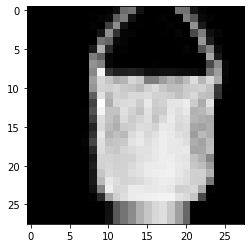

In [28]:
# data augmentation 
image_size = 28
batch_size = 256
epochs = 5
input_size = 28*28
x_train = np.reshape(fmtrainImages, [-1, image_size, image_size, 1])
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=5.0,  # randomly rotate images in the range (deg 0 to 180)
        width_shift_range=5.0,  # randomly shift images horizontally
        height_shift_range=5.0,  # randomly shift images vertically
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(x_train)

max_batches = 10000 // batch_size
for e in range(epochs):
        batches = 0
        for x_batch, y_batch in datagen.flow(x_train, fmtrainLabels, batch_size=batch_size):
            x_batch = np.reshape(x_batch, [-1, input_size])
            model.fit(x_batch, y_batch, verbose=0)
            batches += 1
            if batches >= max_batches:
                break

im = np.reshape(x_batch[10,:], [28, 28])
plt.imshow(im, cmap='gray')
plt.show()

In [27]:
x_test = np.reshape(fmtestImages, [-1, input_size])
scores = model.evaluate(x_test, fmtestLabels, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

297/297 [==============================] - 2s 6ms/step - loss: 0.5063 - accuracy: 0.8177
Test loss: 0.5062791705131531
Test accuracy: 0.8176842331886292
